In [10]:
import boto3
import pandas as pd

## Defining the s3 bucket
s3 = boto3.resource('s3')
bucket_name = 'ryan-greiner-bucket'
bucket = s3.Bucket(bucket_name)

## Defining the file to be read from s3 bucket
file_key = 'Real_Estate(1).csv'
bucket_object = bucket.Object(file_key)
file_object = bucket_object.get()
file_content_stream = file_object.get('Body')

## Reading CSV file
price = pd.read_csv(file_content_stream)
price.head()

,No,transaction_date,house_age,distance_to_the_nearest_MRT_station,number_of_convenience_stores,latitude,longitude,house_price_of_unit_area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [12]:
price = price.drop(columns = ['No', 'transaction_date'], axis = 1)
price.head()

,house_age,distance_to_the_nearest_MRT_station,number_of_convenience_stores,latitude,longitude,house_price_of_unit_area
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1


In [13]:
from sklearn.model_selection import train_test_split

X = price.drop(columns = 'house_price_of_unit_area', axis = 1)
Y = price['house_price_of_unit_area']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [16]:
from sklearn.linear_model import LinearRegression
lm_md = LinearRegression().fit(X_train, Y_train)

In [17]:
lm_pred = lm_md.predict(X_test)
lm_pred

array([45.00919606, 48.66606095, 32.86091929, 36.48302461, 24.73869215,
       42.66397058, 40.87015821, 43.1655083 , 42.35090076, 49.57862065,
       30.48951926, 49.7439104 , 45.49457209, 42.64027139, 44.96707161,
       40.20513663, 35.05927789, 48.16876723, 37.24747973, 25.11656656,
       39.41869291, 30.71020958, 42.84348221, 30.03920596, 45.00919606,
       53.51678388, 15.85995959, 45.14802888, 32.93475395, 48.55486181,
       37.87775241, 44.96419559, 44.91497249, 31.95799996, 44.70391335,
       46.02729325, 39.14511769, 14.68282835, 30.31158144, 37.75469463,
       37.96424416, 45.57525735, 34.04286603, 45.08303073, 15.85995959,
       41.13524845, 43.81851115, 24.90677834, 45.4039665 , 39.67150973,
       32.34452463, 15.88457114, 48.32664606, 43.24152994, 51.5711978 ,
       47.48315557, 29.39312271, 34.03099342, 45.08303073, 44.86574938,
       42.54312946, 39.82937143, 38.53507117, 43.43444857, 41.01782754,
       31.47830866, 25.29480194, 41.81356334, 49.10839611, 25.16

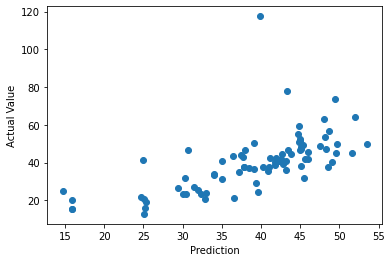

In [21]:
import matplotlib.pyplot as plt

plt.scatter(lm_pred, Y_test)
plt.xlabel('Prediction')
plt.ylabel('Actual Value')
plt.show()

In [23]:
import numpy as np
np.mean((Y_test - lm_pred)**2)

142.92387853100277